In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. 加载数据 ---
df = pd.read_csv('14_data_EUW_Apex.csv')

# --- 2. 清理列名 (这是一个好习惯) ---
df.columns = df.columns.str.strip()

# --- 3. 筛选出所有“14分钟差异”相关的列 ---
# 这是我们本次分析的主角
diff_cols_14 = [col for col in df.columns if 'diff_14' in col]

# 创建一个新的、只包含我们所需数据的DataFrame
df_analysis = df[diff_cols_14]

# --- 4. 验证我们的准备工作 ---
print("成功筛选出以下用于分析的列：")
print(df_analysis.columns)

print("\n数据预览：")
print(df_analysis.head())

成功筛选出以下用于分析的列：
Index(['top_gold_diff_14', 'top_exp_diff_14', 'top_cs_diff_14',
       'jungle_gold_diff_14', 'jungle_exp_diff_14', 'jungle_cs_diff_14',
       'mid_gold_diff_14', 'mid_exp_diff_14', 'mid_cs_diff_14',
       'adc_gold_diff_14', 'adc_exp_diff_14', 'adc_cs_diff_14',
       'support_gold_diff_14', 'support_exp_diff_14', 'support_cs_diff_14',
       'dragonKills_diff_14', 'grubKills_diff_14', 'towerKills_diff_14',
       'towerPlatesDestroyed_diff_14'],
      dtype='object')

数据预览：
   top_gold_diff_14  top_exp_diff_14  top_cs_diff_14  jungle_gold_diff_14  \
0               674             1272             -11                -1535   
1              -674            -1272              11                 1535   
2             -1703             -720               0                  988   
3              1703              720               0                 -988   
4              -276              291             -20                 1379   

   jungle_exp_diff_14  jungle_cs_diff_1

In [2]:
# --- 5. 计算相关系数矩阵 ---
# .corr() 方法是Pandas库中用于计算相关性的强大工具
corr_matrix = df_analysis.corr()

# --- 6. 查看结果 ---
print("\n所有差异指标间的相关系数矩阵：")
print(corr_matrix)


所有差异指标间的相关系数矩阵：
                              top_gold_diff_14  top_exp_diff_14  \
top_gold_diff_14                      1.000000         0.861201   
top_exp_diff_14                       0.861201         1.000000   
top_cs_diff_14                        0.799452         0.789590   
jungle_gold_diff_14                   0.162523         0.156480   
jungle_exp_diff_14                    0.192889         0.154501   
jungle_cs_diff_14                     0.124267         0.073913   
mid_gold_diff_14                      0.098763         0.092283   
mid_exp_diff_14                       0.062442         0.051058   
mid_cs_diff_14                        0.014157        -0.003944   
adc_gold_diff_14                     -0.043984        -0.019234   
adc_exp_diff_14                      -0.005771        -0.008810   
adc_cs_diff_14                       -0.095276        -0.077989   
support_gold_diff_14                  0.092206         0.070531   
support_exp_diff_14                  -0.02526

C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1829647894.py:13: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from font(s) DejaVu Sans.
  plt.savefig('correlation_heatmap.png', dpi=300)
C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1829647894.py:13: UserWarning: Glyph 25103 (\N{CJK UNIFIED IDEOGRAPH-620F}) missing from font(s) DejaVu Sans.
  plt.savefig('correlation_heatmap.png', dpi=300)
C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1829647894.py:13: UserWarning: Glyph 26089 (\N{CJK UNIFIED IDEOGRAPH-65E9}) missing from font(s) DejaVu Sans.
  plt.savefig('correlation_heatmap.png', dpi=300)
C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1829647894.py:13: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.savefig('correlation_heatmap.png', dpi=300)
C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1829647894.py:13: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.


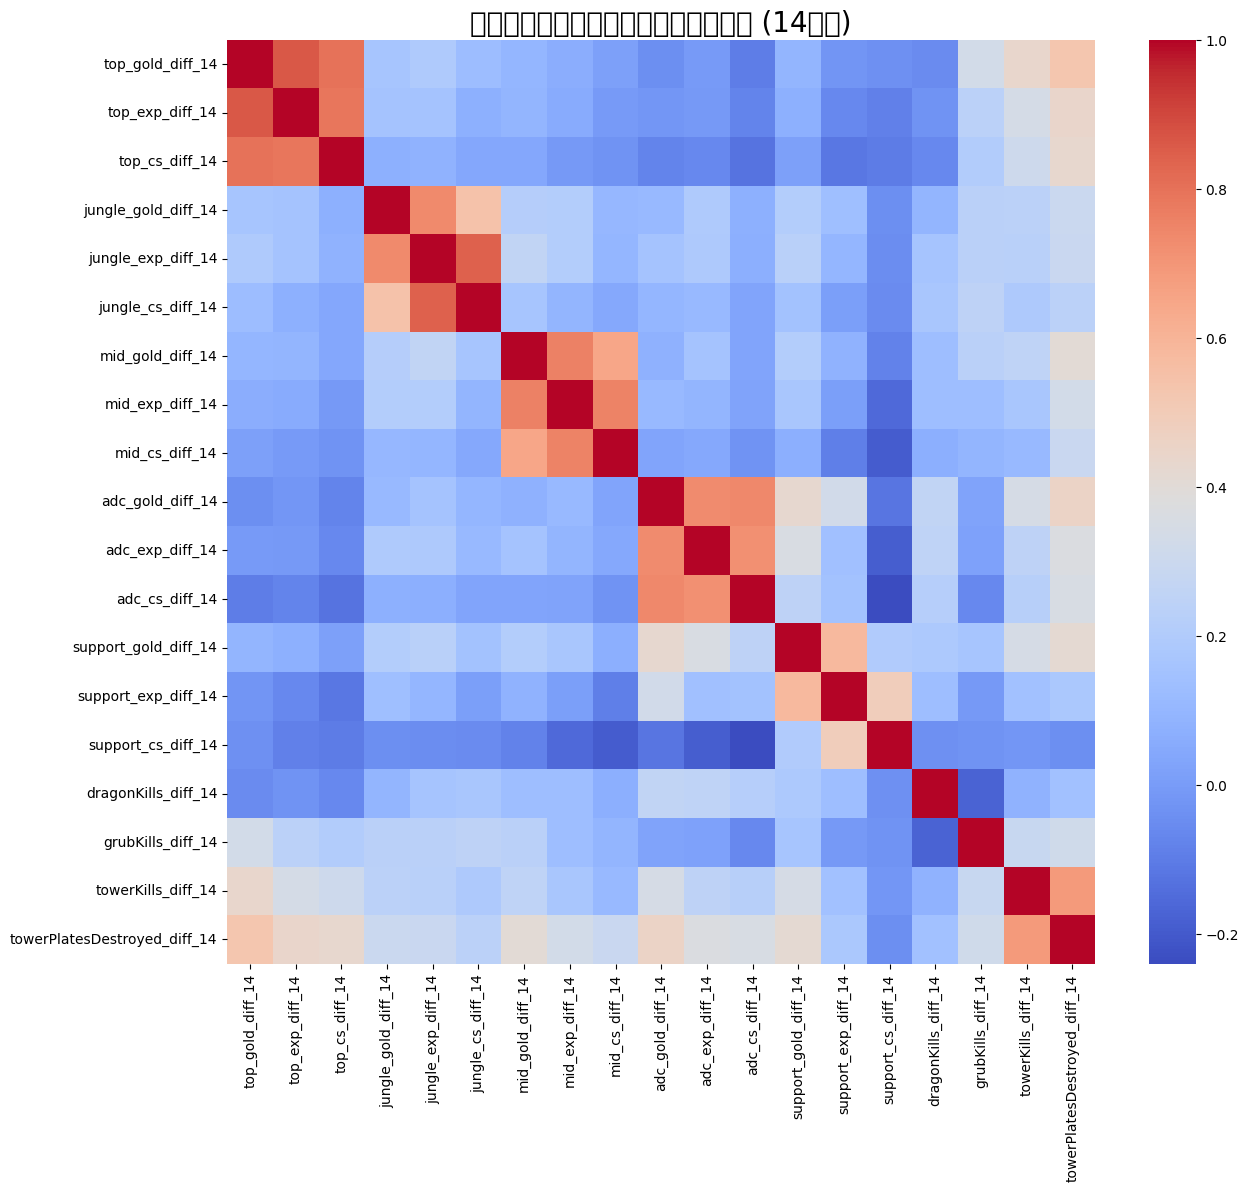


分析完毕！热力图已保存为 correlation_heatmap.png


In [3]:
# --- 7. 绘制热力图 ---
# 设置一个大一点的画布，让图表更清晰
plt.figure(figsize=(14, 12))

# 使用seaborn的heatmap函数来绘制热力图
# cmap='coolwarm' 是一个很常用的色板，红色代表正相关，蓝色代表负相关
sns.heatmap(corr_matrix, cmap='coolwarm')

# 添加一个信息丰富的标题
plt.title('游戏早期各项优势指标的关联性热力图 (14分钟)', fontsize=20)

# 保存并显示图表
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

print("\n分析完毕！热力图已保存为 correlation_heatmap.png")

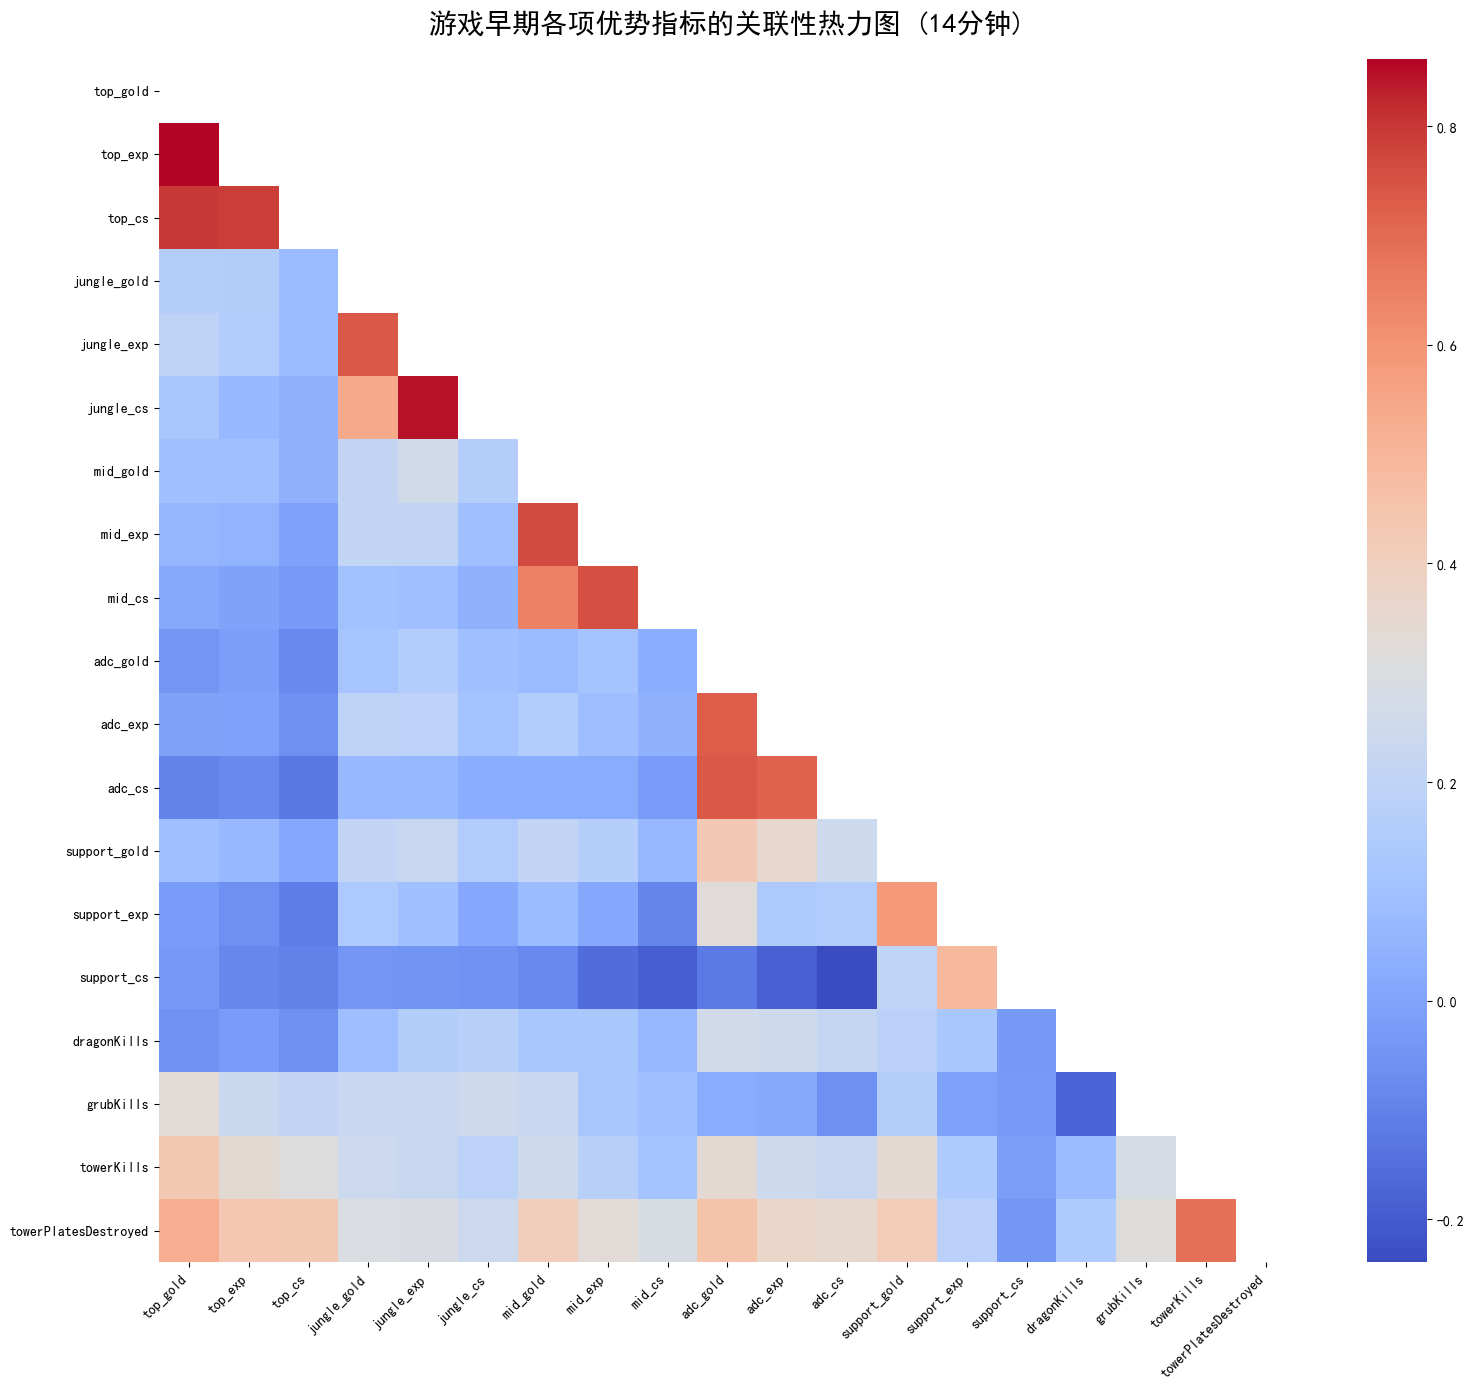


--- 最强的5个正相关性 ---
                 指标1                 指标2      相关系数
0   top_gold_diff_14     top_exp_diff_14  0.861201
2  jungle_cs_diff_14  jungle_exp_diff_14  0.844555
4     top_cs_diff_14    top_gold_diff_14  0.799452
6    top_exp_diff_14      top_cs_diff_14  0.789590
8   mid_gold_diff_14     mid_exp_diff_14  0.762707

--- 最强的5个负相关性 ---
                     指标1                 指标2      相关系数
332      mid_exp_diff_14  support_cs_diff_14 -0.155877
334  dragonKills_diff_14   grubKills_diff_14 -0.176034
336   support_cs_diff_14     adc_exp_diff_14 -0.188594
338       mid_cs_diff_14  support_cs_diff_14 -0.193729
340   support_cs_diff_14      adc_cs_diff_14 -0.239602


In [5]:
import numpy as np # 需要导入numpy库来创建遮罩
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# --- 关键修复代码：设置支持中文的字体 ---
# 1. 设置字体为'SimHei'或其他你系统里有的中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
# 2. 解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# --- 修复代码结束 ---

# --- （第一步和第二步的代码不变，这里省略）---
# 假设 df_analysis 和 corr_matrix 已经准备好了
# df_analysis = ...
# corr_matrix = ...

# --- 7. 可视化分析结果 (优化版本) ---

# 创建一个遮罩(mask)，只显示热力图的下三角部分
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 设置一个更大的画布
plt.figure(figsize=(16, 14))

# 为了让标签更简洁，我们去掉列名中重复的 "_diff_14" 部分
clean_labels = [col.replace('_diff_14', '') for col in corr_matrix.columns]

# 使用seaborn的heatmap函数来绘制热力图
# mask=mask 会应用我们的遮罩
# annot=True 会在格子上显示数字, fmt='.2f' 控制数字格式为两位小数
# 为了避免数字太小看不清，我们先不加annot=True，重点看颜色
sns.heatmap(corr_matrix, 
            mask=mask, 
            cmap='coolwarm', 
            xticklabels=clean_labels, 
            yticklabels=clean_labels)

# 旋转X轴的标签，防止重叠
plt.xticks(rotation=45, ha='right') # ha='right'让标签对齐得更好
plt.yticks(rotation=0)

# 添加标题
plt.title('游戏早期各项优势指标的关联性热力图 (14分钟)', fontsize=20, pad=20)

# 自动调整布局，防止标签被裁切
plt.tight_layout()

# 保存并显示图表
plt.savefig('correlation_heatmap_optimized.png', dpi=300)
plt.show()

# --- 额外步骤：以列表形式清晰展示最强的关联性 ---
# 有时候热力图上的数字太多会很乱，不如直接把最重要的结果打印出来

# 将矩阵转换为长格式，并移除重复和自身相关的项
strongest_corrs = corr_matrix.unstack().sort_values(ascending=False)
strongest_corrs = strongest_corrs[strongest_corrs != 1.0] # 移除自己和自己的相关性
strongest_corrs = strongest_corrs.reset_index()
strongest_corrs.columns = ['指标1', '指标2', '相关系数']

# 由于(A,B)和(B,A)是重复的，我们只取一半
strongest_corrs = strongest_corrs.iloc[::2] 

print("\n--- 最强的5个正相关性 ---")
print(strongest_corrs.head(5))

print("\n--- 最强的5个负相关性 ---")
print(strongest_corrs.tail(5))